### Let's briefly look at dataset

In [1]:
import os, numpy as np, matplotlib.pyplot as plt, imageio, cv2, pandas as pd
import torch
from collections import Counter

In [2]:
%matplotlib inline

data_dir = '../../Data/APTOS_2019/train_images/'
train_csv = pd.read_csv('../../Data/APTOS_2019/train_2019.csv')

train_data_list = os.listdir(data_dir)

target_img_size = (512, 512)

whole_shape_value = np.array([0,0])

for index, image in enumerate(train_data_list):
    
#     print(index, image)
    
    img_arr = imageio.imread(os.path.join(data_dir, image))
    img_id = image.rstrip('.png')
    
#     plt.imshow(img_arr); plt.title(img_id); plt.colorbar()
#     plt.show()
#     plt.close()
    
#     print(img_id, np.array(img_arr.shape))
    whole_shape_value = np.add(np.array(img_arr.shape[:2]), whole_shape_value)
    
    # image resize
    
#     resized_img_arr = cv2.resize(img_arr, target_img_size)
    
#     plt.imshow(resized_img_arr); plt.title(img_id); plt.colorbar()
#     plt.show()
#     plt.close()
    
#     print(resized_img_arr.shape)

    if index == 1:
        break
    
#     break

print( "Average image size : " , whole_shape_value/index+1)

Average image size :  [2963. 4261.]


In [3]:
Counter(list(train_csv['diagnosis']))

Counter({2: 999, 4: 295, 1: 370, 0: 1805, 3: 193})

torch.Size([3, 512, 512]) 2


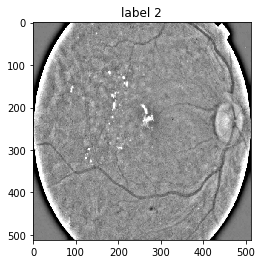

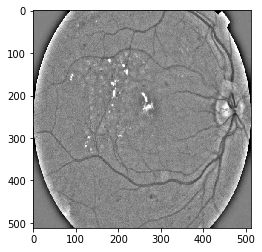

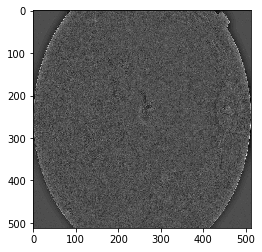

In [9]:
%matplotlib inline

from aptos_dataset import aptos_dataset
from preprocessing import preprocessing

data_dir = '../../Data/APTOS_2019/train_images/'
label_file = '../../Data/APTOS_2019/train_2019.csv'

dataset = aptos_dataset(d_path=data_dir, label_file=label_file)

#TODO 

for i, sample in enumerate(dataset):
    
    print(sample['image'].size(), sample['label'])
    
    img_arr = sample['image'].numpy()
    img_label = sample['label']
    
    plt.title('label %d'%(img_label))
    plt.imshow(img_arr[0], cmap='gray')
    plt.show()
    
    plt.imshow(img_arr[1], cmap='gray')
    plt.show()
    
    plt.imshow(img_arr[2], cmap='gray')
    plt.show()
    
    break

In [12]:
from torch.utils.data import DataLoader
from torchvision import utils

dataloader = DataLoader(dataset, batch_size=8,
                        shuffle=True)

for i, batch in enumerate(dataloader):
    print(batch['image'].size(), batch['label'])
    break

torch.Size([8, 3, 512, 512]) tensor([2, 0, 0, 1, 0, 0, 1, 2])


0 torch.Size([8, 3, 512, 512]) torch.Size([8])
1 torch.Size([8, 3, 512, 512]) torch.Size([8])
2 torch.Size([8, 3, 512, 512]) torch.Size([8])
3 torch.Size([8, 3, 512, 512]) torch.Size([8])


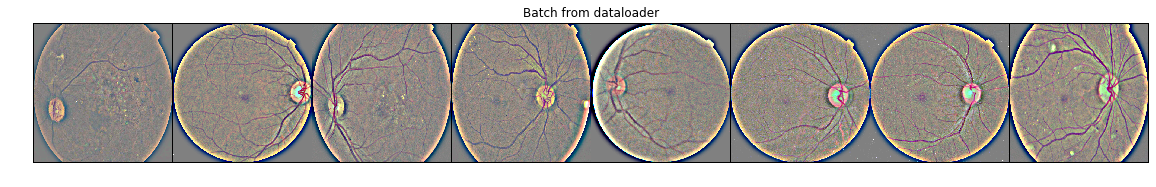

In [14]:
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['label']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure(figsize=(20,20))
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break